# Coloreado de grafos

## Integrantes

1. **Marcos Damián Pool Canul. 200300591@ucaribe.edu.mx**

2. **Oscar Manuel Ruiz Reyes. 190300392@ucaribe.edu.mx**

***Profesor: Ricardo Armando Ruíz Hernández***

### 1. El usuario debe indicar el número de aristas.

In [14]:
# Pedir al usuario que ingrese el número de aristas y vertices para el grafo.
num_edges = int(input("Ingrese el número de aristas para el grafo: "))
num_vertices = int(input("Ingrese el número de vertices para el grafo: "))

### 3. A cada arista debe asignarle un color de un total de 4.

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random


def create_colored_graph(num_edges, num_vertices):
	# Crear un grafo vacío
	G = nx.Graph()

	# Añadir vértices
	G.add_nodes_from(range(num_vertices))

	# Añadir aristas asegurándonos que el grafo sea conexo
	while len(G.edges) < num_edges:
		# Elegir dos vértices al azar
		u, v = random.sample(list(G.nodes), 2)  # Convert set to list

		# Añadir una arista si no existe y si no forma un ciclo
		if not G.has_edge(u, v):
			G.add_edge(u, v)

	# Asegurar que el grafo es conexo
	if not nx.is_connected(G):
		# Añadir aristas hasta que el grafo sea conexo
		additional_edges = nx.complement(G).edges()
		for u, v in additional_edges:
			G.add_edge(u, v)
			if nx.is_connected(G):
				break

	# Asignar colores aleatorios a las aristas
	colors = ['red', 'green', 'blue', 'yellow']
	for edge in G.edges:
		G.edges[edge]['color'] = random.choice(colors)

	return G

In [16]:
G = create_colored_graph(num_edges, num_vertices)

### 4. Mostrar el grafo generado.

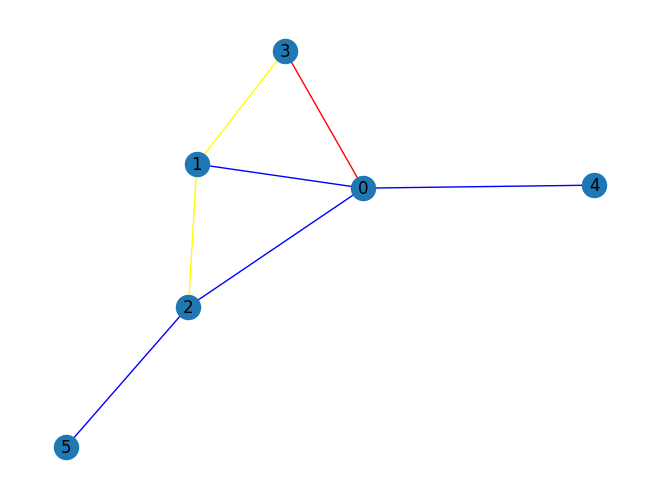

In [17]:
# Dibujar el grafo
colors = [G[u][v]['color'] for u, v in G.edges]
nx.draw(G, with_labels=True, edge_color=colors)
plt.show()

### 5. Aplicar el algoritmo Welsh y Powell.

In [18]:
def welsh_powell(graph):
    # Ordenar los vértices según su grado descendente
    sorted_nodes = sorted(
        graph.nodes, key=lambda x: graph.degree(x), reverse=True)

    # Inicializar colores de vértices
    colors = {node: None for node in graph.nodes}

    # Asignar colores
    color = 0
    while None in colors.values():
        available_nodes = [
            node for node in sorted_nodes if colors[node] is None]
        for node in available_nodes:
            if all(colors[neighbor] != color for neighbor in graph.neighbors(node)):
                colors[node] = color
        color += 1

    return colors

In [19]:
# Aplicar el algoritmo de Welsh y Powell al grafo
vertex_colors = welsh_powell(G)

# Colorear los vértices del grafo
node_colors = [vertex_colors[node] for node in G.nodes]

### 6. Mostrar resultado.

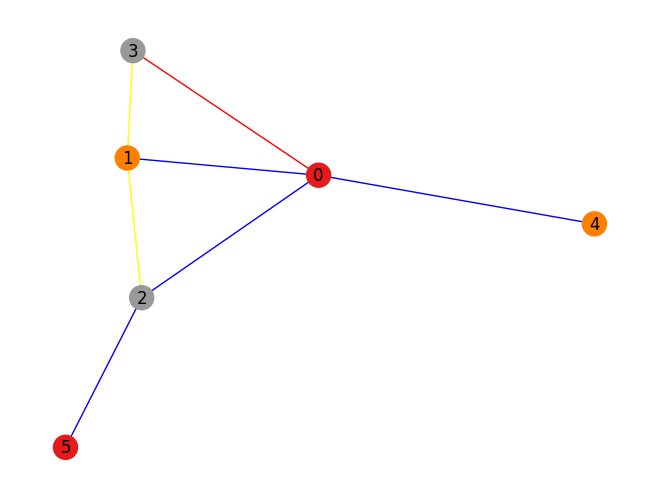

In [20]:
# Dibujar el grafo
nx.draw(G, with_labels=True, node_color=node_colors,
        edge_color=colors, cmap=plt.cm.Set1)
plt.show()